# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [12]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [13]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [154]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
from dateutil import parser

### Notebook Presentation

In [65]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [66]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [67]:
duplicated_df_data = df_data[df_data.duplicated()]
print(f"The shape of the DataFrame is: {df_data.shape}")
print(f"This DataFrame has so many duplicates: {duplicated_df_data.shape}\n")
print(f"NAN-Values in column: \n{df_data.isna().sum()}")
df_data.head(100)

The shape of the DataFrame is: (4324, 9)
This DataFrame has so many duplicates: (0, 9)

NAN-Values in column: 
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
95,95,95,ILS,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Wed Oct 09, 2019 10:17 UTC",Proton-M/Briz-M | Eutelsat 5 West B & MEV-1,StatusActive,65.0,Success
96,96,96,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Fri Oct 04, 2019 18:51 UTC",Long March 4C | Gaofen 10 (Replacement),StatusActive,64.68,Success
97,97,97,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Sep 26, 2019 07:46 UTC",Soyuz 2.1b/Fregat | Cosmos 2541,StatusActive,48.5,Success
98,98,98,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Wed Sep 25, 2019 13:57 UTC",Soyuz FG | Soyuz MS-15 (61S),StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [68]:
nan_row_df_data = df_data[df_data["Price"].isna()]
print(nan_row_df_data.shape)

df_data.fillna(0, inplace= True)

(3360, 9)


In [69]:
Indices = ['Unnamed: 0.1', 'Unnamed: 0']
df_data_clean = df_data.drop(Indices, axis= 1)
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [70]:
df_data_clean.describe(include= 'all')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0,Success
freq,1777,235,2,6,3534,3360,3879


In [72]:
df_data_clean['Price'] = df_data_clean['Price'].str.replace(',', '')
df_data_clean["Price"] = df_data_clean["Price"].astype(float)
df_data_clean.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [73]:
df_organisation_count = df_data_clean.Organisation.value_counts().to_frame().reset_index()
df_organisation_count.rename(columns={'index': 'Organisation', 'Organisation': 'Count'}, inplace=True)

df_organisation_count.head()

,Organisation,Count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203


<BarContainer object of 56 artists>

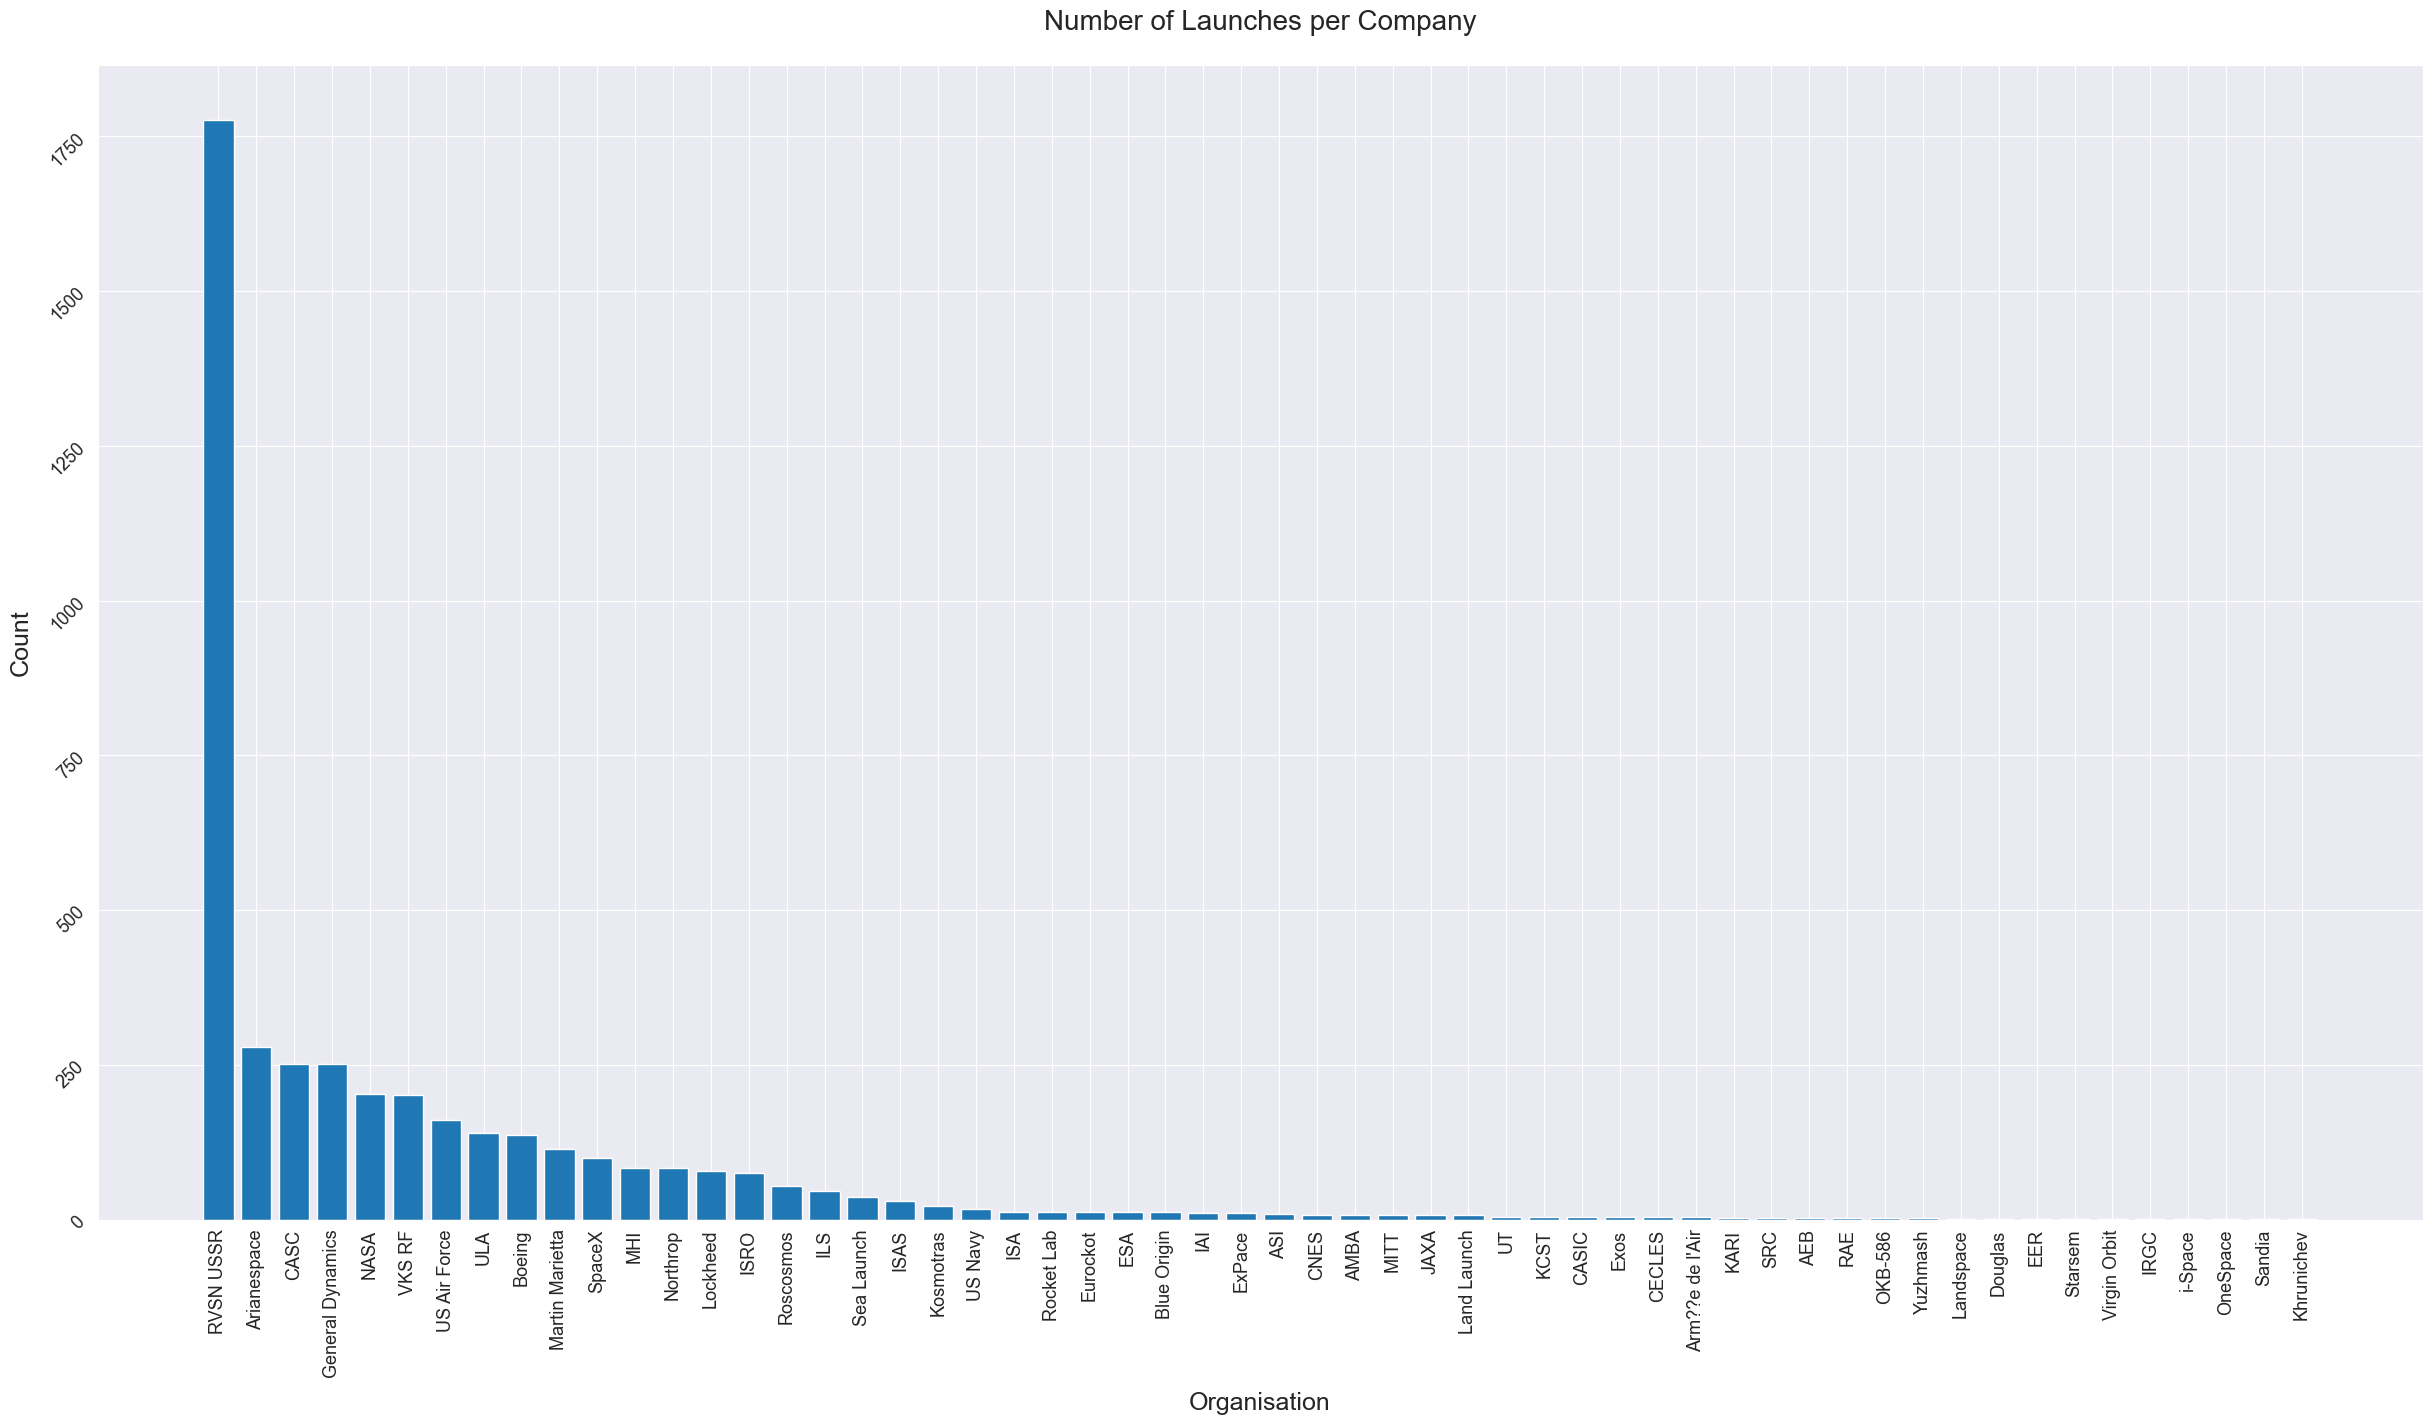

In [74]:
# Plot DataFrame.
plt.figure(figsize=(30, 15))
plt.title("Number of Launches per Company", fontsize= 20, pad= 25)
plt.xticks(fontsize= 13, rotation= 90)
plt.yticks(fontsize= 13, rotation= 45)
plt.ylabel("Count", fontsize= 18, labelpad= 10)
plt.xlabel("Organisation", fontsize= 18, labelpad= 10)

plt.bar(df_organisation_count["Organisation"], df_organisation_count["Count"])

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [75]:
rocket_status_count = df_data_clean.Rocket_Status.value_counts()

rocket_status_count.rename(index={'StatusRetired': 'Retired', 'StatusActive': 'Active'}, inplace=True)
print(rocket_status_count)

Retired    3534
Active      790
Name: Rocket_Status, dtype: int64


In [76]:
fig = px.pie(labels= rocket_status_count.index,
             values= rocket_status_count.values,
             title="Status of Rockets",
             names=rocket_status_count.index,
             hole=0.6,
             )
fig.update_traces(textposition='outside', textfont_size=15, textinfo='percent')

C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [77]:
mission_status_count = df_data_clean.Mission_Status.value_counts()
print(mission_status_count)

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64


In [78]:
fig = px.pie(labels= mission_status_count.index,
             values= mission_status_count.values,
             title="Status of Rockets",
             names=mission_status_count.index,
             hole=0.6,
             )
fig.update_traces(textposition='outside', textfont_size=15, textinfo='percent')

C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

TypeError: 'value' must be an instance of str or bytes, not a int

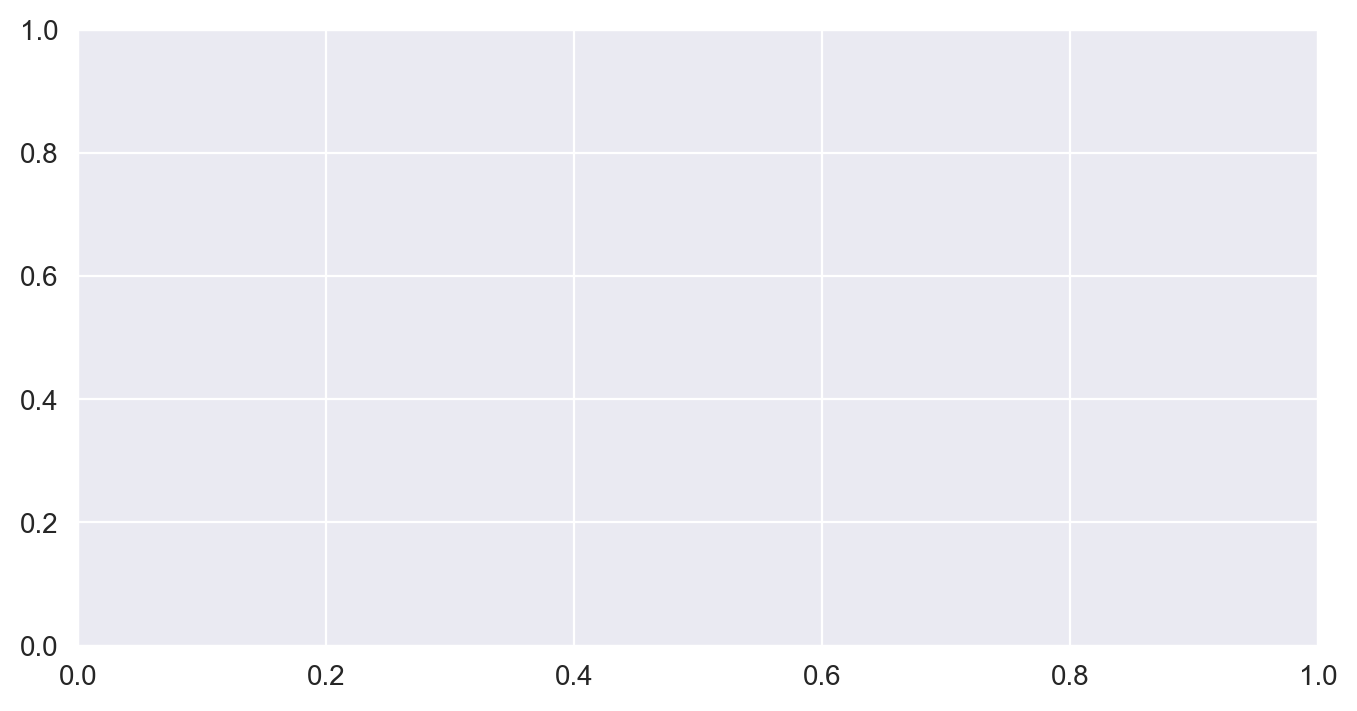

In [79]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data_clean,
             x=df_data["Price"],
             bins=30)
plt.xlabel('Price for Launches (In Millions USD)')
plt.title('Distribution of Age on Receipt of Prize')

In [80]:
hist = px.histogram(df_data_clean,
                    x='Price',
                    color='Organisation',
                    nbins=30,
                    opacity=0.6,
                    barmode='overlay',
                    histnorm='percent',
                    marginal='box',)

hist.update_layout(xaxis_title='Price for Launches (In Millions USD)',
                   yaxis_title='Count',)

hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [92]:
selected_columns = ['Organisation', 'Location', 'Mission_Status', 'Price']
df_selected_columns = df_data_clean[selected_columns]

,Organisation,Location,Mission_Status,Price
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Success,50.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Success,29.75
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Success,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Success,65.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Success,145.00


In [91]:
burst = px.sunburst(df_selected_columns,
                    path=['Organisation', 'Mission_Status', 'Location'],
                    #values='',
                    title='Where do Discoveries Take Place?',
                    )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [122]:
df_grouped = df_selected_columns.groupby('Organisation')['Price'].sum().to_frame().reset_index()
df_grouped_sorted = df_grouped.sort_values(by= 'Price', ascending=False)
df_grouped_sorted.head(200)

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


<BarContainer object of 56 artists>

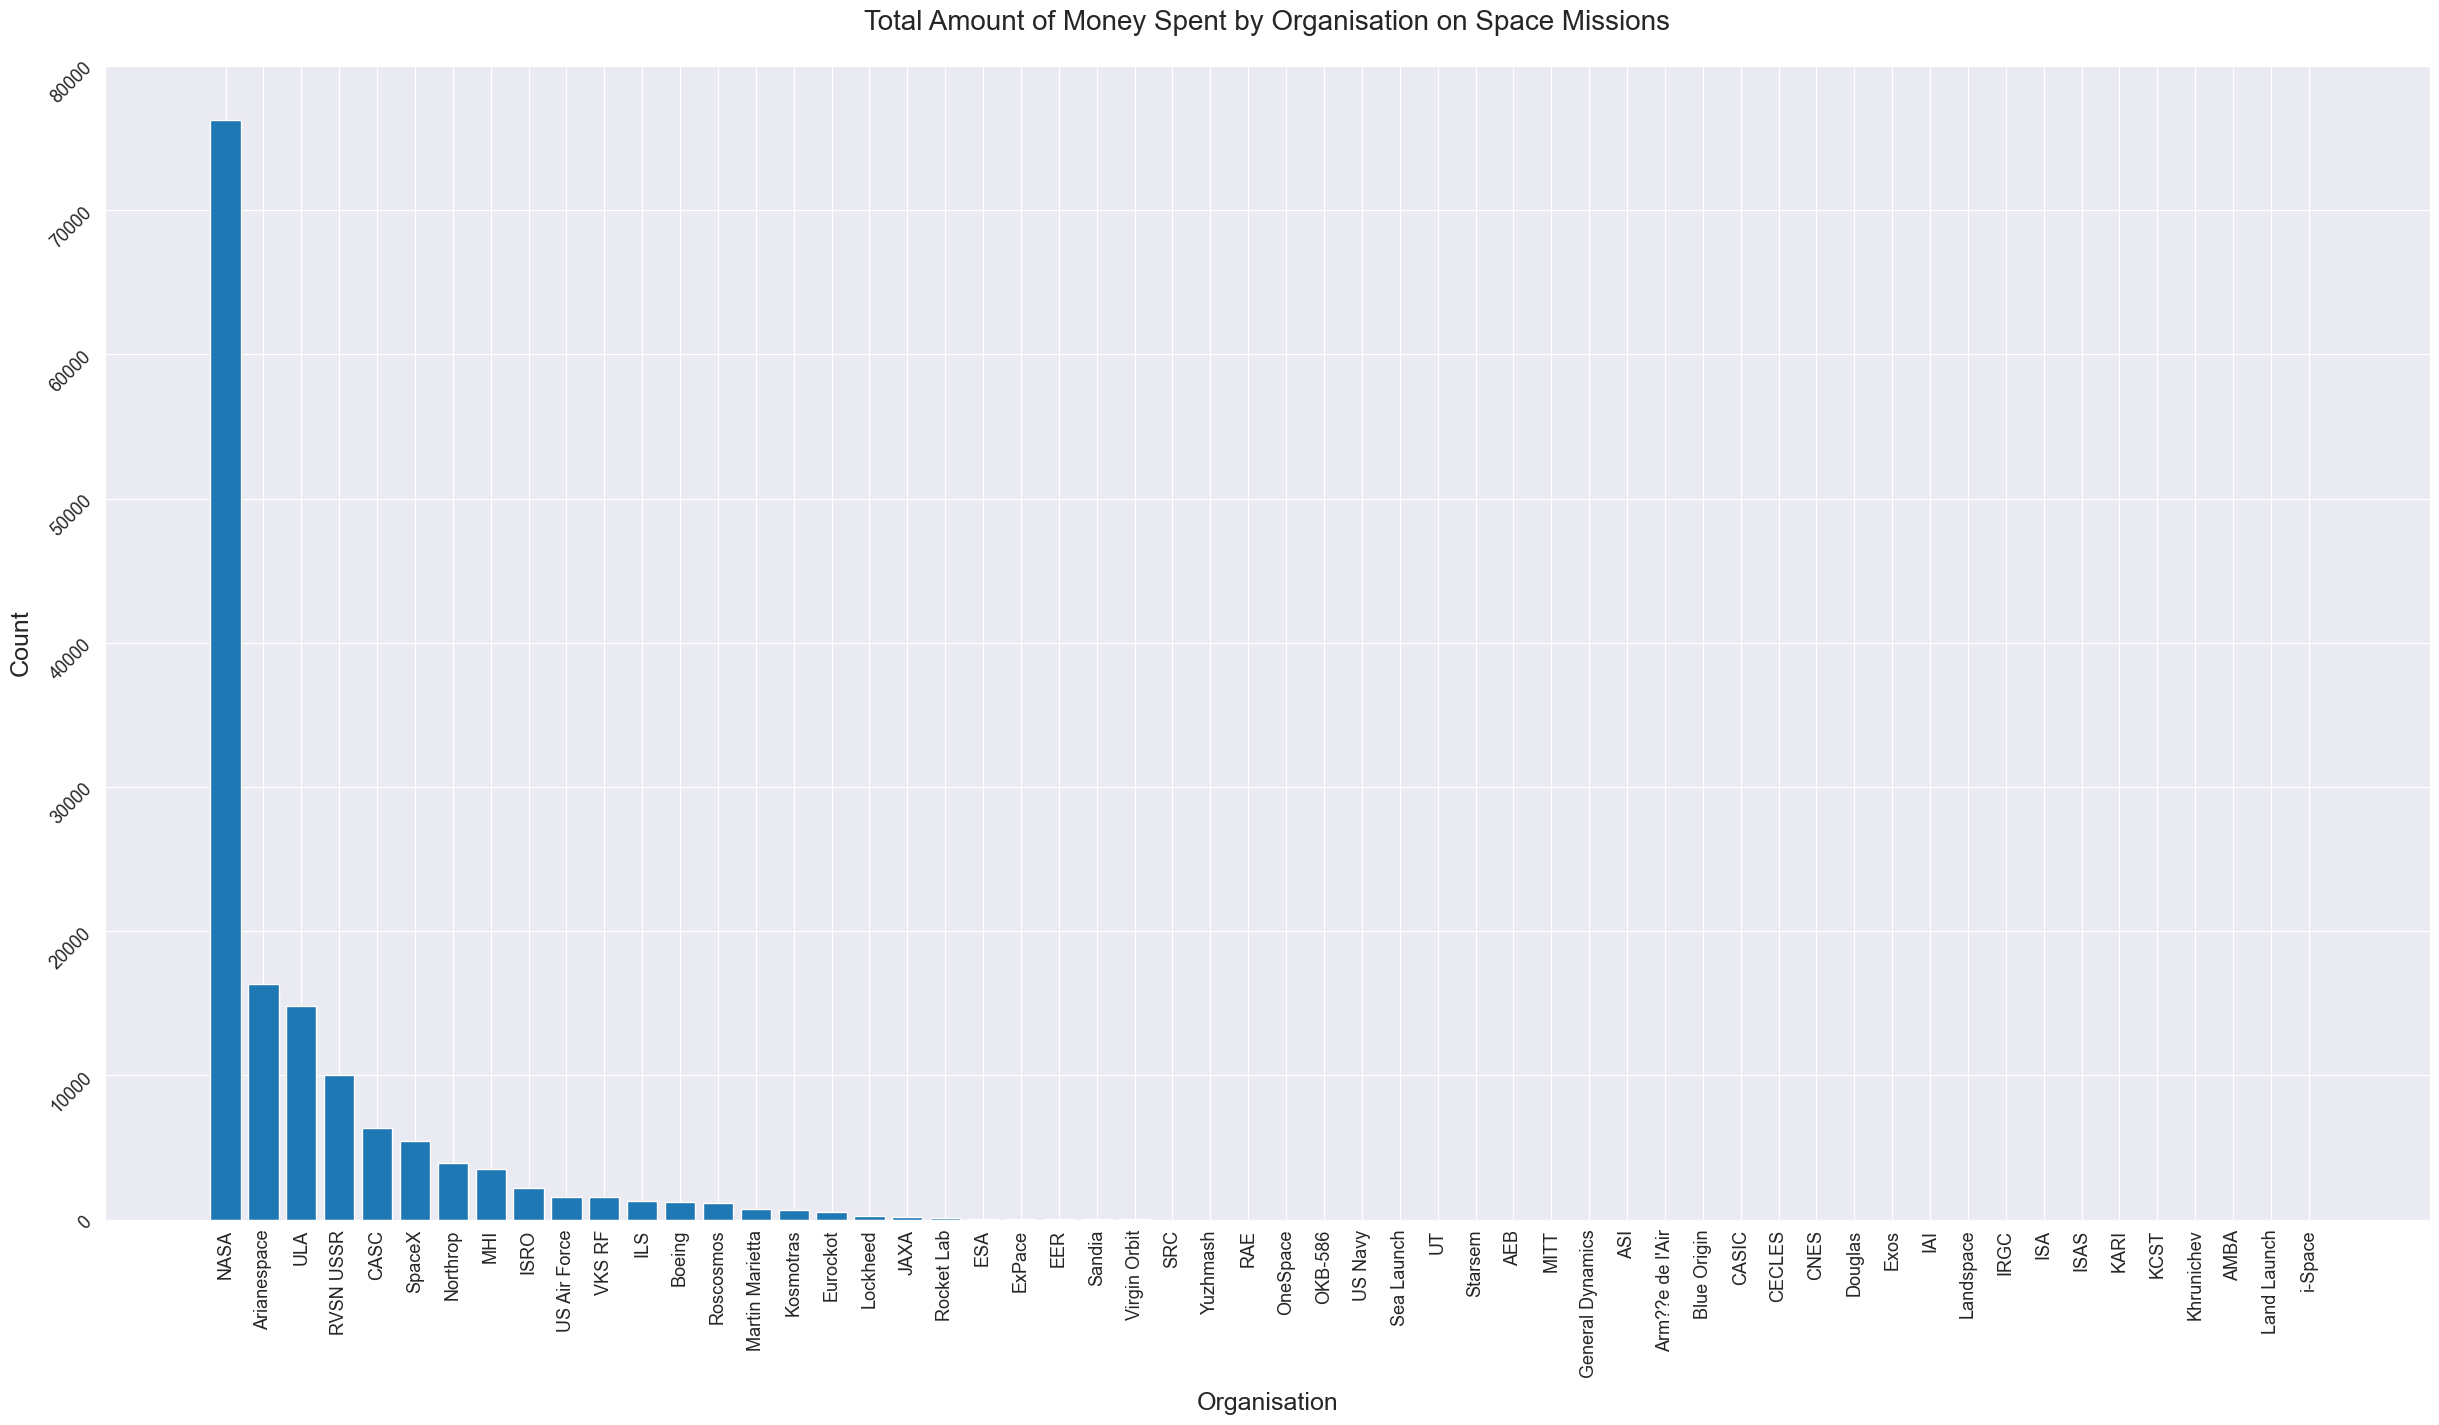

In [109]:
# Plot DataFrame.
plt.figure(figsize=(30, 15))
plt.title("Total Amount of Money Spent by Organisation on Space Missions", fontsize= 20, pad= 25)
plt.xticks(fontsize= 13, rotation= 90)
plt.yticks(fontsize= 13, rotation= 45)
plt.ylabel("Count", fontsize= 18, labelpad= 10)
plt.xlabel("Organisation", fontsize= 18, labelpad= 10)

plt.bar(df_grouped_sorted["Organisation"], df_grouped_sorted["Price"])

# Analyse the Amount of Money Spent by Organisation per Launch

In [133]:
df_grouped_mean = df_selected_columns.groupby('Organisation')['Price'].mean().to_frame().reset_index()
df_grouped_mean.fillna(0, inplace= True)
df_grouped_sorted_mean = df_grouped_mean.sort_values(by= 'Price', ascending=False)
df_grouped_sorted_mean.head(200)

,Organisation,Price
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00


<BarContainer object of 56 artists>

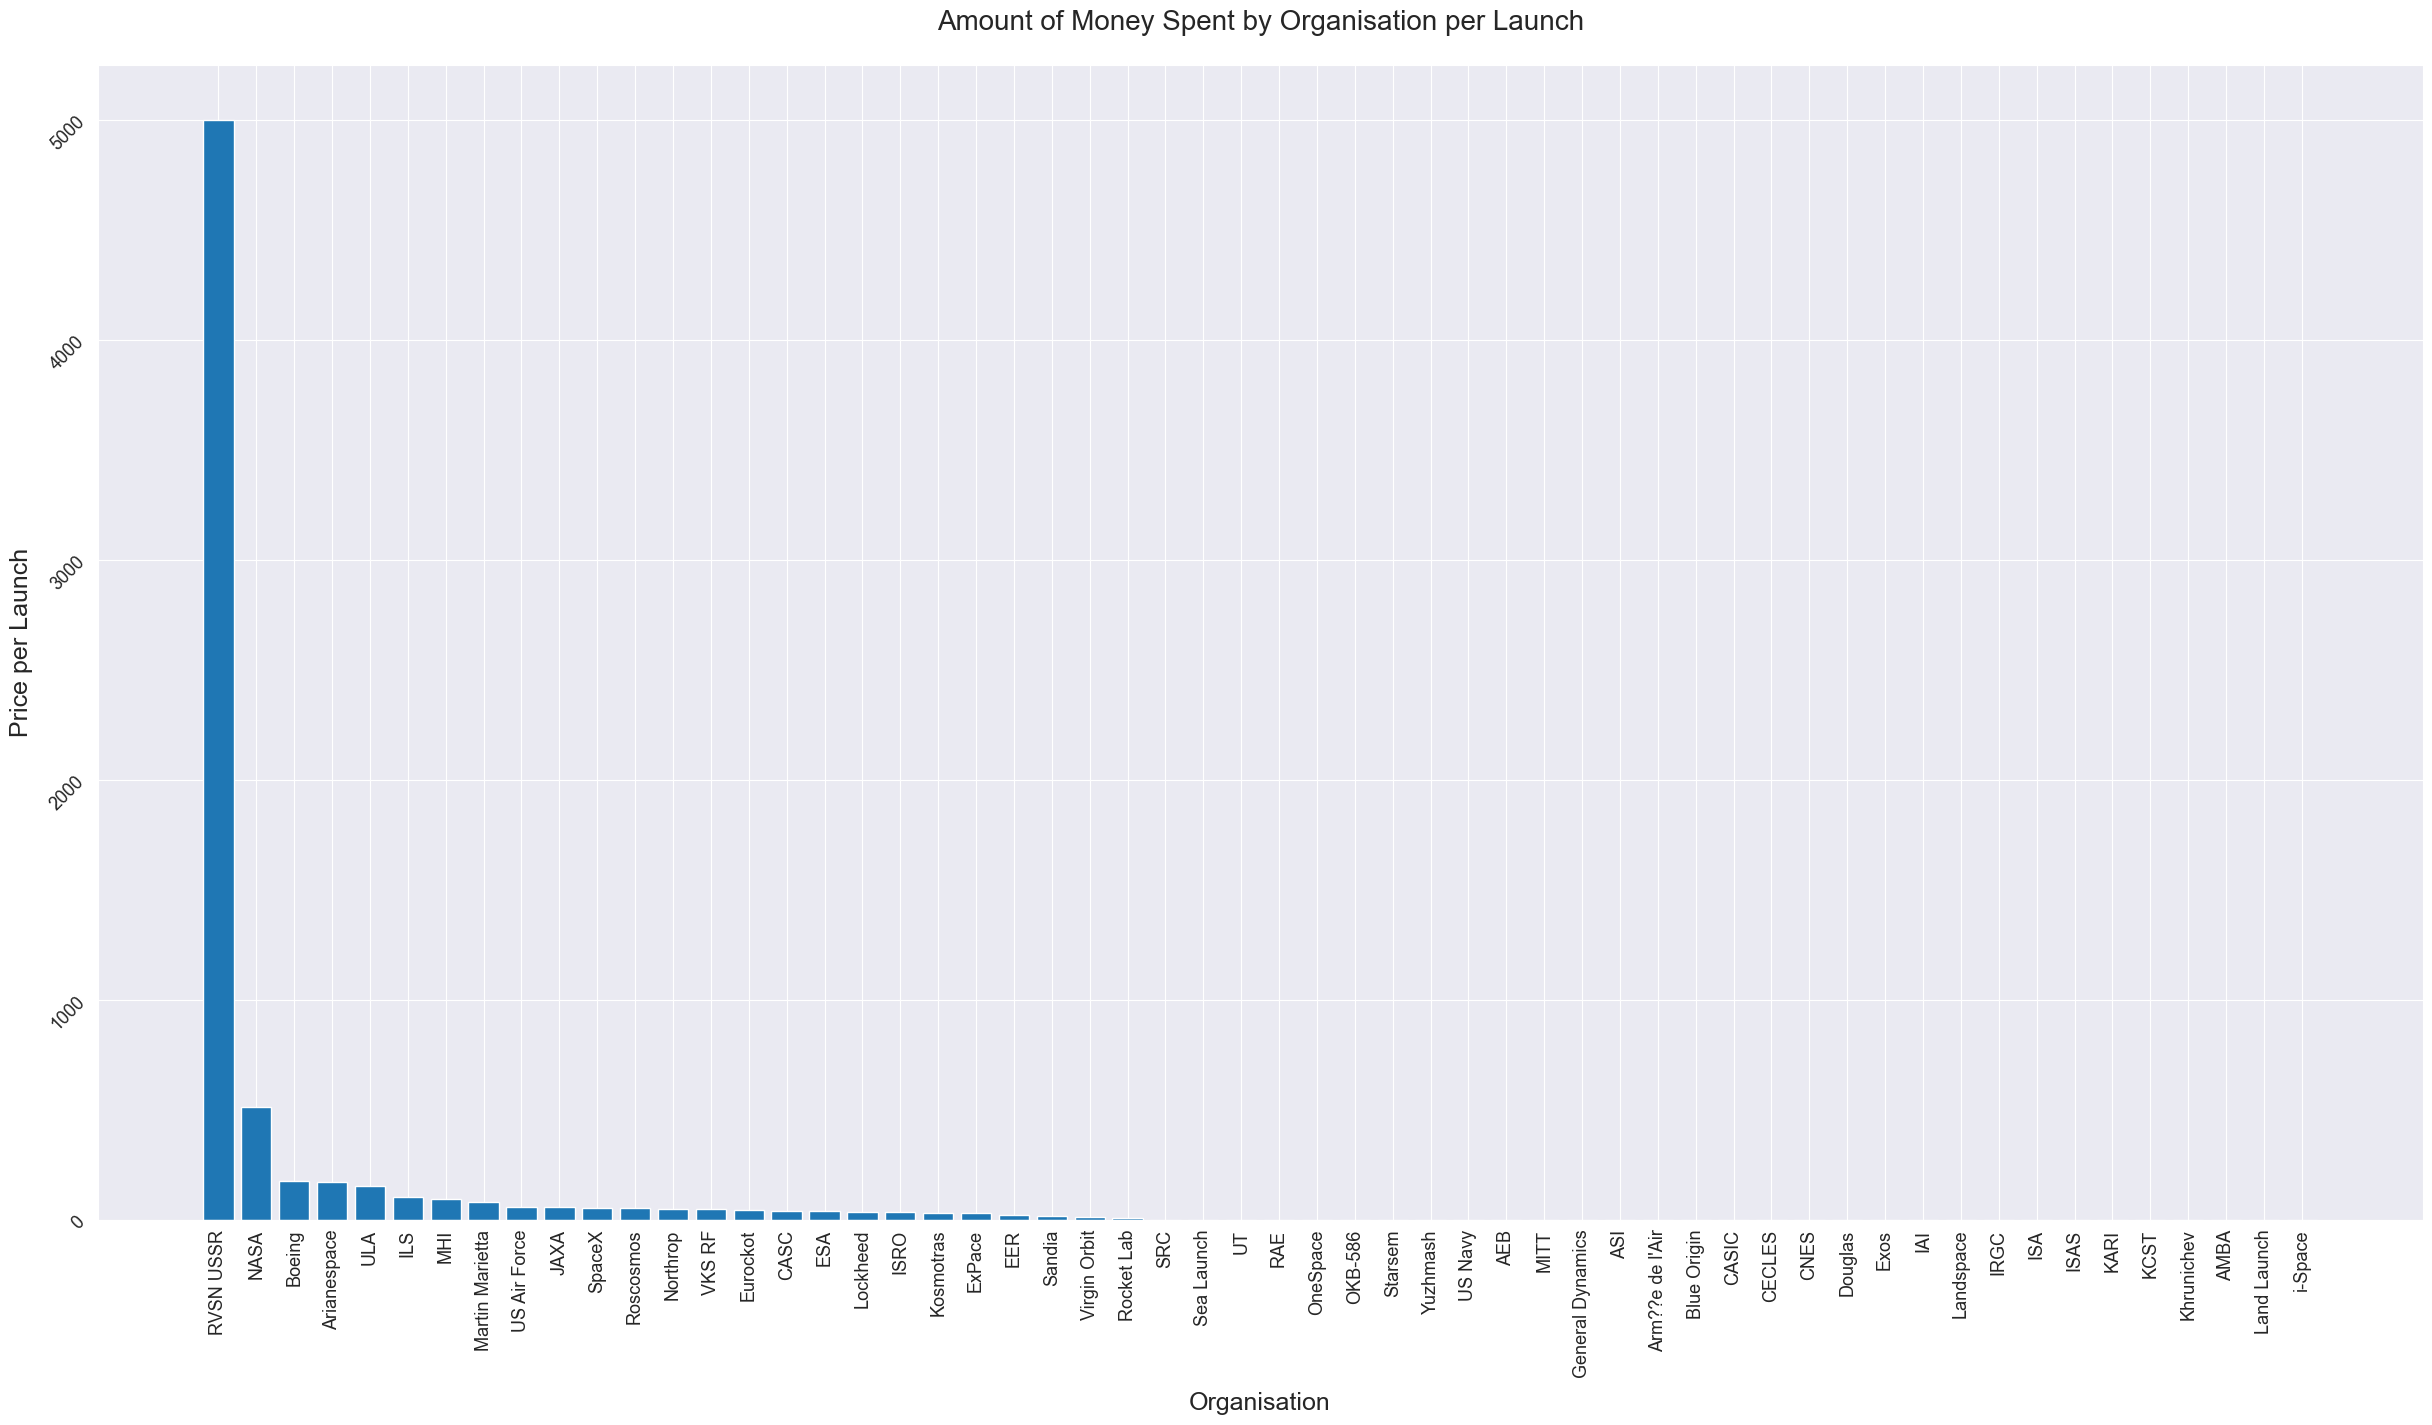

In [135]:
# Plot DataFrame.
plt.figure(figsize=(30, 15))
plt.title("Amount of Money Spent by Organisation per Launch", fontsize= 20, pad= 25)
plt.xticks(fontsize= 13, rotation= 90)
plt.yticks(fontsize= 13, rotation= 45)
plt.ylabel("Price per Launch", fontsize= 18, labelpad= 10)
plt.xlabel("Organisation", fontsize= 18, labelpad= 10)

plt.bar(df_grouped_sorted_mean["Organisation"], df_grouped_sorted_mean["Price"])

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 